In [4]:
import pandas as pd
!pip install langdetect
import langdetect

pd.set_option("display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Datasets/yelp_review.csv',nrows=100000)

df=df[['text','stars']]
print(df.head(5))
# calling detect on each sentence
df['Language'] = df['text'].apply(lambda x: langdetect.detect(x))
# filtering the entire dataset for only english
filtered_for_english = df.loc[df['Language'] == 'en']

filtered_for_english.to_csv('/content/drive/MyDrive/CAPSTONE/Datasets/yelp_reviews_filtered_1lakh_total.csv',sep=',', index=False, header=True,chunksize=3000)
print(len(filtered_for_english))

                                                text  stars
0  Super simple place but amazing nonetheless. It...      5
1  Small unassuming place that changes their menu...      5
2  Lester's is located in a beautiful neighborhoo...      5
3  Love coming here. Yes the place always needs t...      4
4  Had their chocolate almond croissant and it wa...      4
98821


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#to preprocess the data
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CAPSTONE/Datasets/yelp_reviews_filtered_1lakh_total.csv")
df.head()


,text,stars,Language
0,Super simple place but amazing nonetheless. It...,5,en
1,Small unassuming place that changes their menu...,5,en
2,Lester's is located in a beautiful neighborhoo...,5,en
3,Love coming here. Yes the place always needs t...,4,en
4,Had their chocolate almond croissant and it wa...,4,en


In [8]:

senti = []
for i in df['stars']:
  if i<3:
    senti.append('negative')
  if i==3:
    senti.append('neutral')
  if i>3:
    senti.append('positive')
print(senti)
df['sentiment'] = senti
df.head()


['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'negative', 'positive', 'negative', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive',

,text,stars,Language,sentiment
0,Super simple place but amazing nonetheless. It...,5,en,positive
1,Small unassuming place that changes their menu...,5,en,positive
2,Lester's is located in a beautiful neighborhoo...,5,en,positive
3,Love coming here. Yes the place always needs t...,4,en,positive
4,Had their chocolate almond croissant and it wa...,4,en,positive


In [10]:

#To remove newlines. 

for i, row in df.iterrows():
    print("before",row['text'])
    ifor_val = row['text'].replace('\n',' ')
    df.at[i,'text'] = ifor_val
print(df['text'])


df.to_csv('/content/drive/MyDrive/CAPSTONE/Datasets/yelp_reviews_sentiment_eng_1lakh.csv',sep=",",index=False,header=True)

Streaming output truncated to the last 5000 lines.
before All the things are true. Just go and check it out.   For less than $5 I walked out with a cheeseburger all the way (onion, chili, & mustard) and a sweet tea.   Cash ONLY.
before Super sweet little dive-y billiards bar hiding near the heart of Plaza Midwood. Cheap beer served by not-the-friendliest bartenders. Patio off the side that lets you enjoy some fresh air. It's a great spot to get away from the hustle and bustle.
before Convenient location inside Southpark Mall. Nice for a little pick me up while shopping. There isn't much, if any, seating. Friendly baristas and fast service.
before We tried to hit up Le's once before, but after surviving the treacherous parking lot, we had to turn around because we didn't have any dolla-dolla bills... So, with cash in hand, we headed back for round 2. Le's is a small, unassuming shop amidst the rows of Vietnamese shops. Order by number and pay at the counter (CASH only!!). We got the #2 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

She called back and we decided to go ahead and I decided to do the Ultimate for $54.99. I never picked up an install kit from the store and was told by the CSR she would waive the $20 fee . I own a CG3000D modem, but was informed that I would not be able to get 300mbps speed on it because it is limited to 150mbps. She told me that I would have to purchase a new modem capable of that speed. 

She worked graveyard and her shift was about to end, so before I head off to the store, she wanted to activate the CG3000D so I would at least have internet until I get the Arris SB6183. The CSR informed me she would call me at 11PM on July 5th, to activate the SB6183. I make the hour drive to purchase the SB6183, waited until 12:30AM until I decided to just call back and hoped another CSR could complete my order. Talked to several different representatives and they all say no such promotion exists and that my self installation fee cannot be waive

In [11]:
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE/Datasets/yelp_reviews_sentiment_eng_1lakh.csv")
#df.to_csv('/content/drive/MyDrive/CAPSTONE/Datasets/yelp_reviews_sentiment_eng10k.csv',sep=",",index=False,header=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


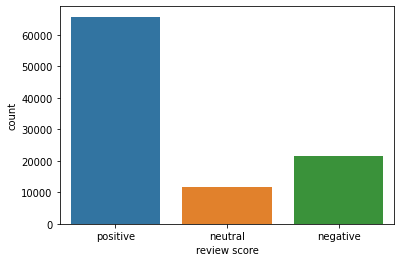

In [13]:
#df=df.rename(columns={'class':'target'})
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df.sentiment)
plt.xlabel('review score');

In [16]:
#now to extract 3k of each positive, negative and neutral

df_positive=df.loc[df['sentiment'] == 'positive']
df_neutral=df.loc[df['sentiment'] == 'neutral']
df_negative=df.loc[df['sentiment'] == 'negative']

df_positive=df_positive[:3333]
df_neutral=df_neutral[:3333]
df_negative=df_negative[:3333]
print(df_positive)


                                                   text  stars Language  \
0     Super simple place but amazing nonetheless. It...      5       en   
1     Small unassuming place that changes their menu...      5       en   
2     Lester's is located in a beautiful neighborhoo...      5       en   
3     Love coming here. Yes the place always needs t...      4       en   
4     Had their chocolate almond croissant and it wa...      4       en   
...                                                 ...    ...      ...   
5228  Have returned to Toss't a few times since my o...      5       en   
5229  What an amazing gem!  Narcisi has certainly pe...      5       en   
5230  Gooo heeeere!   What a hidden gem!! If you're ...      4       en   
5231  I can't believe we've lived in Pittsburgh for ...      4       en   
5232  Had a craving for some Chinese this evening so...      4       en   

     sentiment  
0     positive  
1     positive  
2     positive  
3     positive  
4     positive

In [18]:
frames=[df_positive,df_neutral,df_negative]
final_df=pd.concat(frames)

print(final_df)
final_df.to_csv('/content/drive/MyDrive/CAPSTONE/Datasets/final_balanced.csv',sep=",",index=False,header=True)

                                                    text  stars Language  \
0      Super simple place but amazing nonetheless. It...      5       en   
1      Small unassuming place that changes their menu...      5       en   
2      Lester's is located in a beautiful neighborhoo...      5       en   
3      Love coming here. Yes the place always needs t...      4       en   
4      Had their chocolate almond croissant and it wa...      4       en   
...                                                  ...    ...      ...   
18223  Never again!  I don't care how great the act i...      1       en   
18226  Quick lunch. Red curry chicken had a lot more ...      2       en   
18228  This place used to have some of the best burge...      2       en   
18230  Stopped in for a quick lunch because I was imp...      2       en   
18233  The best things about brunch at this place: th...      2       en   

      sentiment  
0      positive  
1      positive  
2      positive  
3      positive

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


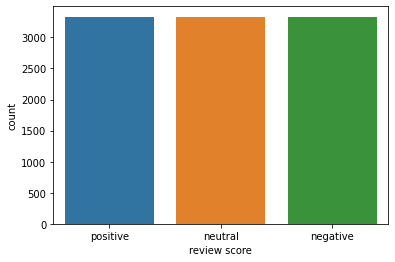

In [19]:
sns.countplot(final_df.sentiment)
plt.xlabel('review score');